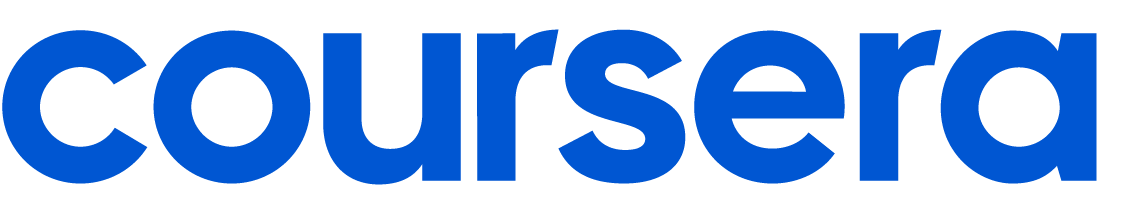

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import any other packages you may want to use
from sklearn.preprocessing import OneHotEncoder as ohe

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [5]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head(5)

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [6]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head(5)

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [7]:
# your code here (optional)
x=train_df.select_dtypes(include=['category','object'])
col= list(x.columns)
if 'CustomerID' in col:
    col.remove('CustomerID')
    
col

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled']

In [8]:
for i in col:
    print(i," ",train_df[i].unique())
    print()

SubscriptionType   ['Premium' 'Basic' 'Standard']

PaymentMethod   ['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']

PaperlessBilling   ['No' 'Yes']

ContentType   ['Both' 'Movies' 'TV Shows']

MultiDeviceAccess   ['No' 'Yes']

DeviceRegistered   ['Mobile' 'Tablet' 'Computer' 'TV']

GenrePreference   ['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']

Gender   ['Male' 'Female']

ParentalControl   ['No' 'Yes']

SubtitlesEnabled   ['No' 'Yes']



In [9]:
columns_to_map=['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled']

In [10]:
# Define the mapping
mapping = {'No': 0, 'Yes': 1}

# Apply the mapping to each specified column
for column in columns_to_map:
    train_df[column] = train_df[column].replace(mapping)

# Display the updated DataFrame
print(train_df[columns_to_map])


        PaperlessBilling  MultiDeviceAccess  ParentalControl  SubtitlesEnabled
0                      0                  0                0                 0
1                      1                  0                0                 1
2                      1                  0                1                 1
3                      0                  0                1                 1
4                      1                  0                0                 0
...                  ...                ...              ...               ...
243782                 0                  0                1                 0
243783                 0                  1                0                 0
243784                 1                  0                1                 1
243785                 1                  0                0                 1
243786                 0                  0                1                 0

[243787 rows x 4 columns]


In [11]:
for colu in train_df.select_dtypes(include=['float64']).columns:
    Q1 = train_df[colu].quantile(0.25)
    Q3 = train_df[colu].quantile(0.75)
    
    iqr = Q3 - Q1
    
    lb = Q1 - 1.5*iqr
    ub = Q3 + 1.5*iqr
    
    outliers = train_df[(train_df[colu] < lb) | (train_df[colu] > ub)][colu]
    
    print(f"Outliers in column '{colu}':")
    if outliers.empty:
        print("No outliers found.\n")
    else:
        print(outliers, "\n")

Outliers in column 'MonthlyCharges':
No outliers found.

Outliers in column 'TotalCharges':
131       2235.234687
627       2331.492139
826       2282.225873
941       2312.623545
975       2282.479878
             ...     
241422    2328.070093
242846    2309.479553
243378    2278.809115
243611    2346.035683
243716    2352.568794
Name: TotalCharges, Length: 741, dtype: float64 

Outliers in column 'ViewingHoursPerWeek':
No outliers found.

Outliers in column 'AverageViewingDuration':
No outliers found.

Outliers in column 'UserRating':
No outliers found.



In [12]:
cap_value = train_df['TotalCharges'].quantile(0.95)
train_df['TotalCharges'] = np.where(train_df['TotalCharges'] > cap_value, cap_value, train_df['TotalCharges'])

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
float_columns = train_df.select_dtypes(include=['float64']).columns
train_df[float_columns] = scaler.fit_transform(train_df[float_columns])

In [16]:
test_df[float_columns] = scaler.transform(test_df[float_columns])

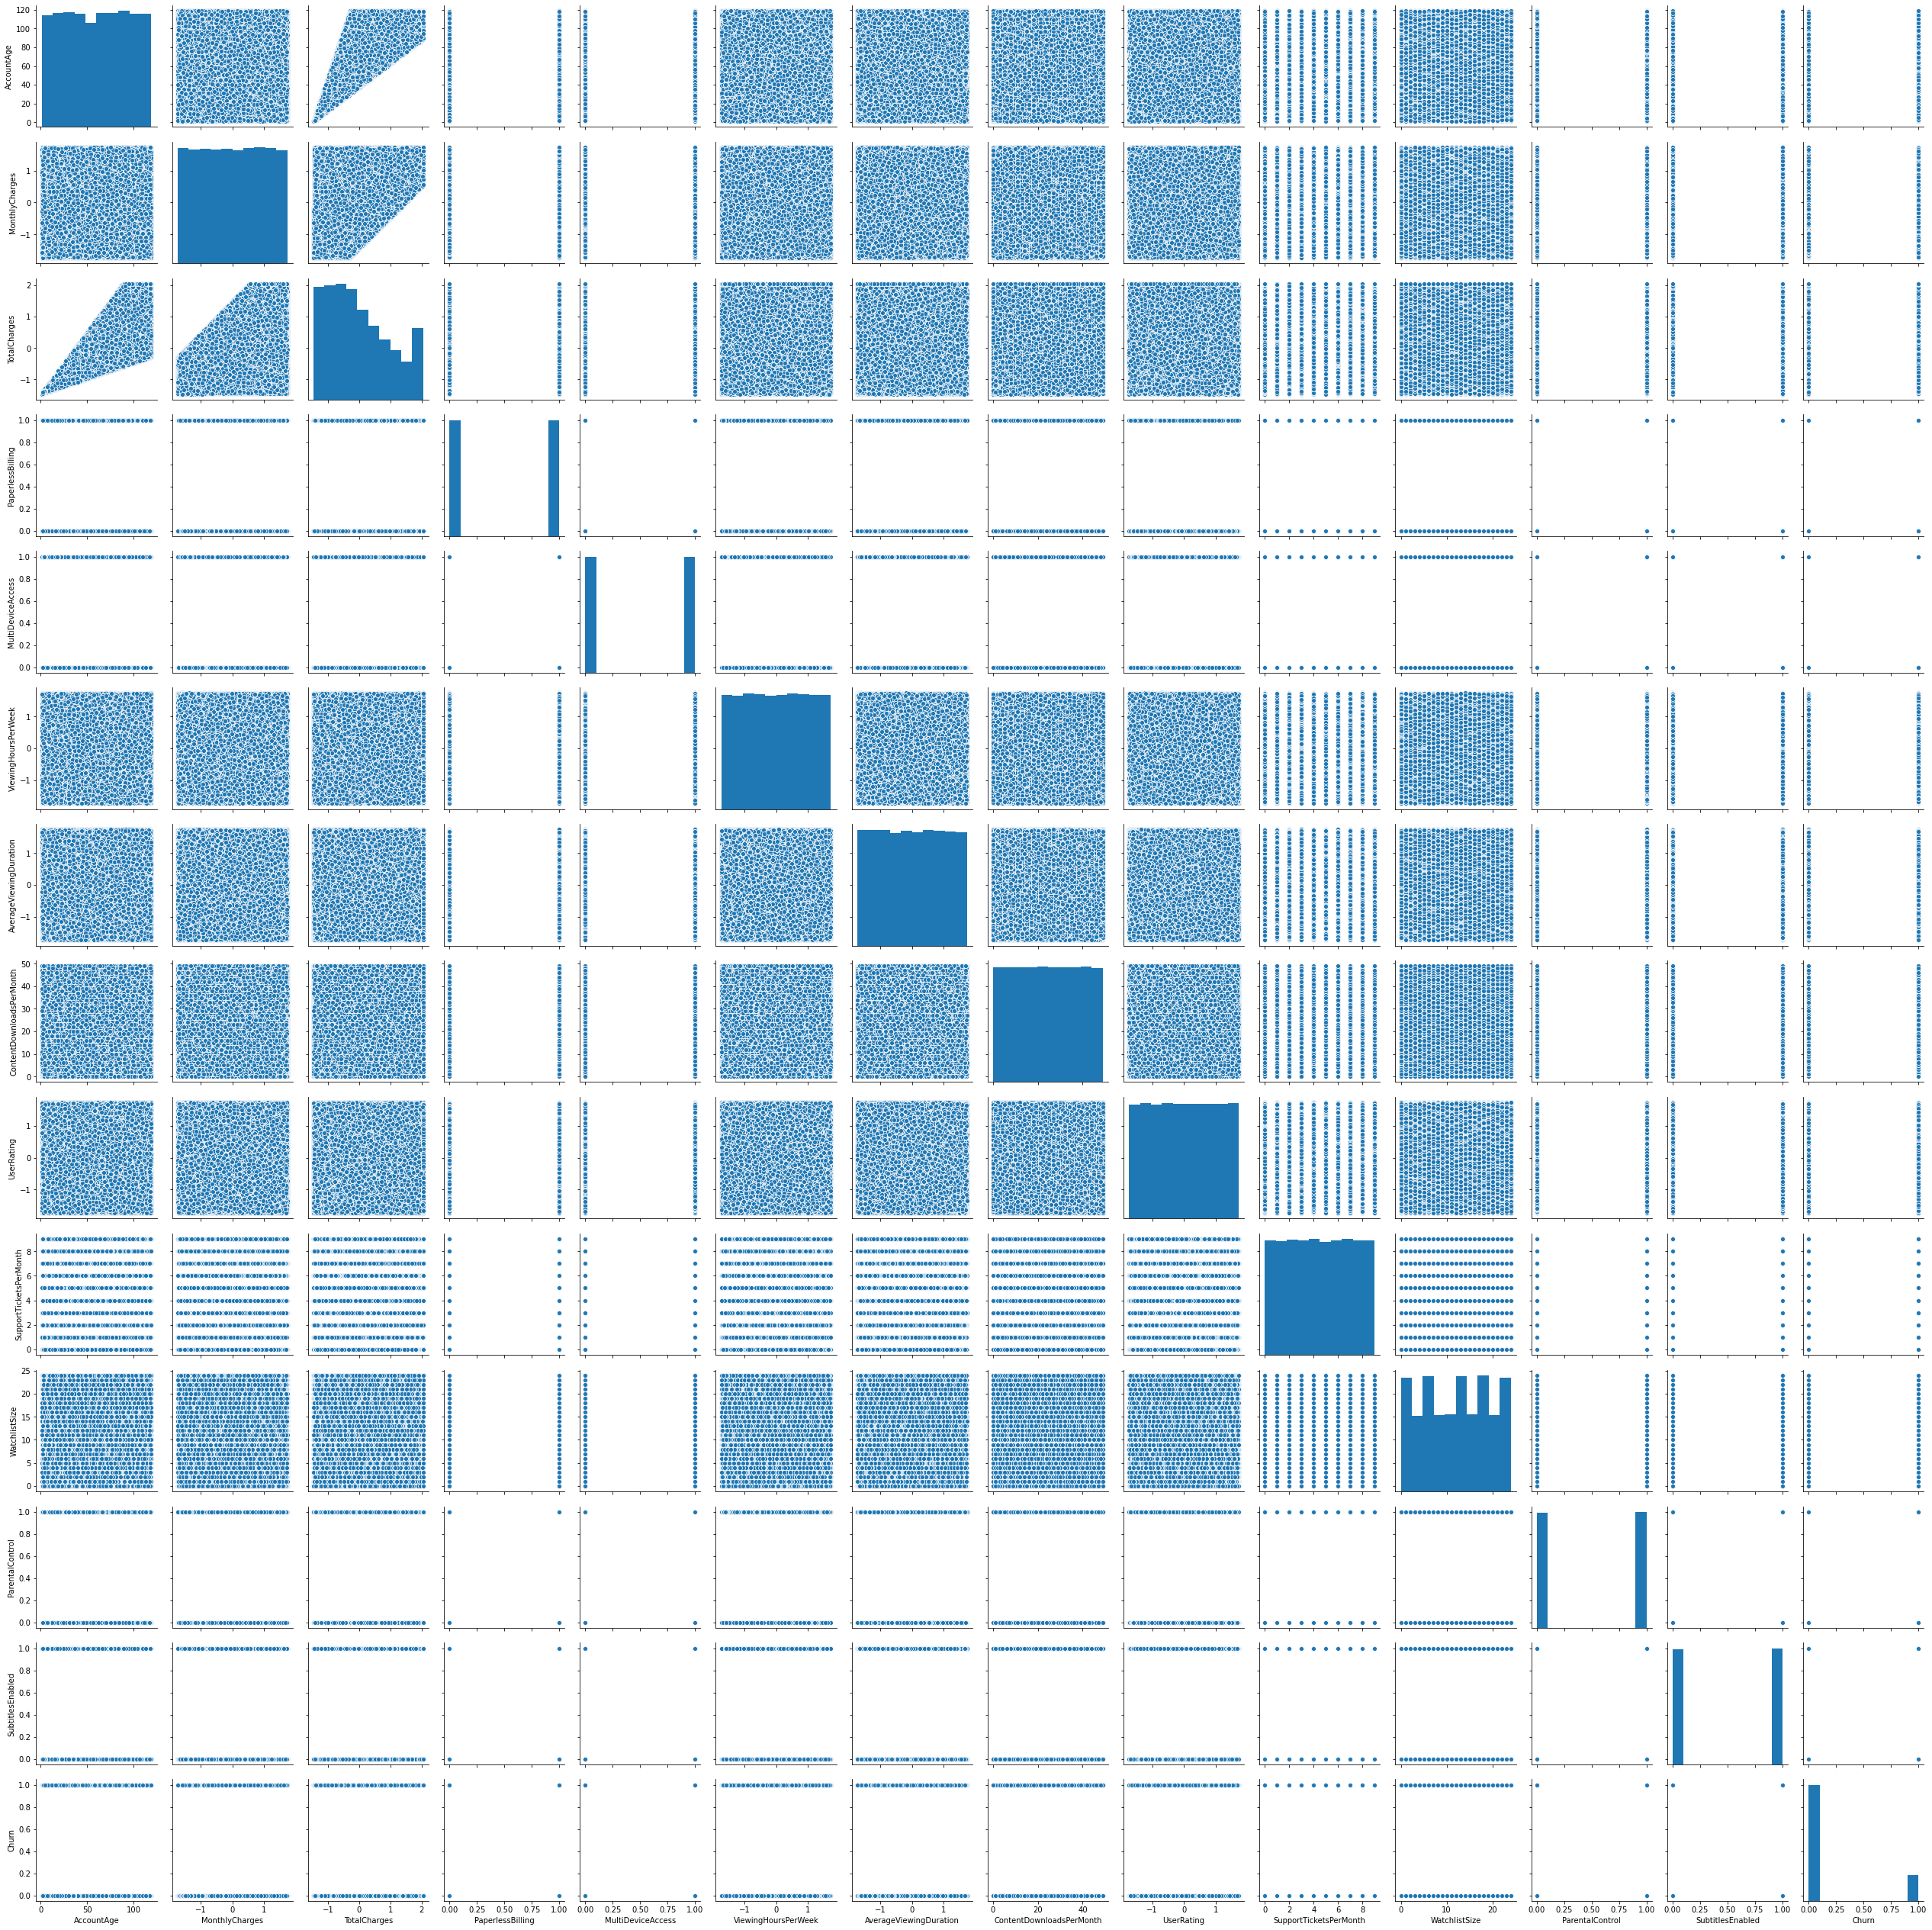

In [50]:
sns.pairplot(train_df)

In [17]:
train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,-0.331703,-1.039338,Premium,Mailed check,0,Both,0,Mobile,1.445777,-0.568906,10,Sci-Fi,-0.715179,4,Male,3,0,0,CB6SXPNVZA,0
1,57,-1.690423,-0.891534,Basic,Credit card,1,Movies,0,Tablet,1.062671,-1.317459,18,Action,0.411960,8,Male,23,0,1,S7R2G87O09,0
2,73,-0.088741,0.286375,Basic,Mailed check,1,Movies,0,Computer,-1.165718,-0.691019,23,Fantasy,1.069988,6,Male,1,1,1,EASDC20BDT,0
3,32,-1.207816,-1.016661,Basic,Electronic check,0,TV Shows,0,Tablet,0.663322,0.777613,30,Drama,1.102179,2,Male,24,1,1,NPF69NT69N,0
4,57,1.031143,0.451497,Premium,Electronic check,1,TV Shows,0,TV,-0.037246,-0.928765,20,Comedy,0.531014,4,Female,0,0,0,4LGYPK7VOL,0


In [18]:
train_df.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [19]:
train_encoded_df=pd.get_dummies(train_df, columns=['SubscriptionType','PaymentMethod','ContentType','DeviceRegistered','GenrePreference','Gender'], drop_first=True )

In [20]:
train_encoded_df.head()

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male
0,20,-0.331703,-1.039338,0,0,1.445777,-0.568906,10,-0.715179,4,3,0,0,CB6SXPNVZA,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1
1,57,-1.690423,-0.891534,1,0,1.062671,-1.317459,18,0.411960,8,23,0,1,S7R2G87O09,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,73,-0.088741,0.286375,1,0,-1.165718,-0.691019,23,1.069988,6,1,1,1,EASDC20BDT,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
3,32,-1.207816,-1.016661,0,0,0.663322,0.777613,30,1.102179,2,24,1,1,NPF69NT69N,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
4,57,1.031143,0.451497,1,0,-0.037246,-0.928765,20,0.531014,4,0,0,0,4LGYPK7VOL,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0


In [21]:
train_encoded_df.shape

(243787, 30)

In [22]:
train_encoded_df.columns


Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'PaperlessBilling',
       'MultiDeviceAccess', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth',
       'WatchlistSize', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID',
       'Churn', 'SubscriptionType_Premium', 'SubscriptionType_Standard',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'ContentType_Movies',
       'ContentType_TV Shows', 'DeviceRegistered_Mobile',
       'DeviceRegistered_TV', 'DeviceRegistered_Tablet',
       'GenrePreference_Comedy', 'GenrePreference_Drama',
       'GenrePreference_Fantasy', 'GenrePreference_Sci-Fi', 'Gender_Male'],
      dtype='object')

In [23]:
integer_columns = train_encoded_df.select_dtypes(include=['int64'])

# Get the list of column names with integer values
col_int = list(integer_columns.columns)
col_int

['AccountAge',
 'PaperlessBilling',
 'MultiDeviceAccess',
 'ContentDownloadsPerMonth',
 'SupportTicketsPerMonth',
 'WatchlistSize',
 'ParentalControl',
 'SubtitlesEnabled',
 'Churn']

In [24]:
train_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   AccountAge                      243787 non-null  int64  
 1   MonthlyCharges                  243787 non-null  float64
 2   TotalCharges                    243787 non-null  float64
 3   PaperlessBilling                243787 non-null  int64  
 4   MultiDeviceAccess               243787 non-null  int64  
 5   ViewingHoursPerWeek             243787 non-null  float64
 6   AverageViewingDuration          243787 non-null  float64
 7   ContentDownloadsPerMonth        243787 non-null  int64  
 8   UserRating                      243787 non-null  float64
 9   SupportTicketsPerMonth          243787 non-null  int64  
 10  WatchlistSize                   243787 non-null  int64  
 11  ParentalControl                 243787 non-null  int64  
 12  SubtitlesEnabled

In [25]:
for column in columns_to_map:
    test_df[column] = test_df[column].replace(mapping)

# Display the updated DataFrame
print(test_df[columns_to_map])


        PaperlessBilling  MultiDeviceAccess  ParentalControl  SubtitlesEnabled
0                      0                  0                0                 0
1                      1                  0                1                 0
2                      0                  1                0                 1
3                      0                  1                1                 1
4                      1                  1                0                 0
...                  ...                ...              ...               ...
104475                 0                  1                0                 1
104476                 1                  1                1                 0
104477                 0                  1                0                 1
104478                 0                  1                1                 0
104479                 1                  0                0                 1

[104480 rows x 4 columns]


In [26]:
test_encoded_df=pd.get_dummies(test_df, columns=['SubscriptionType','PaymentMethod','ContentType','DeviceRegistered','GenrePreference','Gender'], drop_first=True )

In [27]:
test_encoded_df.head()

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male
0,38,1.242876,-0.123233,0,0,0.767017,0.594196,42,0.450126,2,23,0,0,O1W6BHP6RM,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1
1,77,-0.595673,0.045319,1,0,1.456060,-0.696379,43,-0.849307,2,22,1,0,LFR4X92X8H,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,5,0.584230,-1.331434,0,1,-1.147346,0.953367,14,1.561050,2,22,0,1,QM5GBIYODA,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,88,0.662424,1.221953,0,1,1.341570,1.677817,14,1.680308,0,23,1,1,D9RXTK2K9F,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0
4,91,-0.019563,0.776830,1,1,0.266946,-0.434722,6,-0.134890,6,0,0,0,ENTCCHR1LR,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0


In [24]:
test_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   AccountAge                      104480 non-null  int64  
 1   MonthlyCharges                  104480 non-null  float64
 2   TotalCharges                    104480 non-null  float64
 3   PaperlessBilling                104480 non-null  int64  
 4   MultiDeviceAccess               104480 non-null  int64  
 5   ViewingHoursPerWeek             104480 non-null  float64
 6   AverageViewingDuration          104480 non-null  float64
 7   ContentDownloadsPerMonth        104480 non-null  int64  
 8   UserRating                      104480 non-null  float64
 9   SupportTicketsPerMonth          104480 non-null  int64  
 10  WatchlistSize                   104480 non-null  int64  
 11  ParentalControl                 104480 non-null  int64  
 12  SubtitlesEnabled

In [28]:
train_encoded_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male
count,243787.000000,2.437870e+05,2.437870e+05,243787.000000,243787.000000,2.437870e+05,2.437870e+05,243787.000000,2.437870e+05,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,-4.420981e-16,1.410122e-17,0.499645,0.499420,-5.249652e-16,-7.315885e-17,24.503513,-2.023009e-17,4.504186,12.018508,0.500786,0.501175,0.181232,0.331507,0.336031,0.249907,0.251502,0.249205,0.331868,0.332852,0.249866,0.248508,0.250805,0.201241,0.199945,0.200811,0.198280,0.499850
std,34.285143,1.000002e+00,1.000002e+00,0.500001,0.500001,1.000002e+00,1.000002e+00,14.421174,1.000002e+00,2.872548,7.193034,0.500000,0.500000,0.385211,0.470756,0.472351,0.432960,0.433877,0.432554,0.470885,0.471235,0.432936,0.432149,0.433477,0.400929,0.399960,0.400607,0.398705,0.500001
min,1.000000,-1.733206e+00,-1.471679e+00,0.000000,0.000000,-1.734488e+00,-1.727815e+00,0.000000,-1.733559e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,-8.670269e-01,-8.231958e-01,0.000000,0.000000,-8.661028e-01,-8.688555e-01,12.000000,-8.672183e-01,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,1.123191e-03,-1.815636e-01,0.000000,0.000000,1.862075e-03,-2.785589e-04,24.000000,-3.906897e-04,4.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,90.000000,8.659442e-01,6.975462e-01,1.000000,1.000000,8.642343e-01,8.641494e-01,37.000000,8.651276e-01,7.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,119.000000,1.732889e+00,2.051435e+00,1.000000,1.000000,1.734081e+00,1.737154e+00,49.000000,1.728860e+00,9.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
churn_counts = train_df['Churn'].value_counts()
churn_counts

0    199605
1     44182
Name: Churn, dtype: int64

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
!pip install imbalanced-learn

     |████████████████████████████████| 258 kB 34.7 MB/s            
     |████████████████████████████████| 302 kB 119.3 MB/s            
     |████████████████████████████████| 38.1 MB 119.1 MB/s            
     |████████████████████████████████| 24.8 MB 113.0 MB/s            
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: joblib
    Found existing installation: joblib 0.14.1
    Uninstalling joblib-0.14.1:
      Successfully uninstalled joblib-0.14.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
X = train_encoded_df.drop(columns=['Churn','CustomerID'])
y = train_encoded_df['Churn']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [31]:
# logisreg = LogisticRegression(class_weight = 'balanced',solver='lbfgs', max_iter=1000)
# logisreg.fit(X_train, y_train)

In [70]:
rf_clf = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    class_weight='balanced',
    max_depth=10,
    max_features='sqrt',  # Use square root of total features to select features
    min_samples_split=5,  # Split at least 5 samples to create a new node
    min_samples_leaf=2    # Require at least 2 samples to be a leaf node
)
rf_clf.fit(X_resampled, y_resampled)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [71]:
y_pred = rf_clf.predict(X_val)

In [72]:
accuracy=accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

In [73]:
print(f'Validation Accuracy: {accuracy:.4f}')
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Validation Accuracy: 0.7574
Confusion Matrix:
[[33968  5953]
 [ 5877  2960]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     39921
           1       0.33      0.33      0.33      8837

    accuracy                           0.76     48758
   macro avg       0.59      0.59      0.59     48758
weighted avg       0.76      0.76      0.76     48758



In [74]:
# Make predictions on the test set using the trained Logistic Regression model
predicted_probability = tree_clf.predict_proba(test_encoded_df.drop(['CustomerID'], axis=1))[:, 1]
predictions = tree_clf.predict(test_encoded_df.drop(['CustomerID'], axis=1))

# Combine predictions with the CustomerID column into a DataFrame
prediction_df = pd.DataFrame({
    'CustomerID': test_df['CustomerID'].values,
    'predicted_probability': predictions  # Add predicted class labels
})

print(prediction_df.shape)  
prediction_df.head(10) 


(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0
1,LFR4X92X8H,0
2,QM5GBIYODA,0
3,D9RXTK2K9F,0
4,ENTCCHR1LR,1
5,7A88BB5IO6,1
6,70OMW9XEWR,0
7,EL1RMFMPYL,1
8,4IA2QPT6ZK,0
9,AEDCWHSJDN,0


## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [75]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [76]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [77]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [78]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [79]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.